In [23]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from functions import *
from optimizers import *
from applications import *
from projectors import *
import pandas as pd

### Dataset used in the paper

The dataset Madelon is downloaded from: http://archive.ics.uci.edu/ml/datasets.php.

The dataset Marti0 is downloaded from: http://www.causality.inf.ethz.ch

### Nonnegative least squares

In [24]:
train_data = 'data/madelon_train.data'
train_labels = 'data/madelon_train.labels'
A = pd.read_csv(train_data, delimiter=' ', header=None)
A = A.drop(A.shape[1]-1, axis = 1)
b = pd.read_csv(train_labels, delimiter=' ', header=None)
m, n = A.shape
A = A.values
b = b.values
b = b.reshape(m,)

# Least-Squares
f, h, L2, x0 = nonnegative_least_squares(A, b, lambdaL2=0.1)

max_iters = 300
max_runtime = 300
depth = 5
depth_ = 15
reg = 1e-10

xs, Fx, Tx = gradient_descent(x0, max_iters, 1./L2, f, nonneg_projection, max_runtime=max_runtime)
xs_ls, Fx_ls, Tx_ls = gradient_descent(x0, max_iters, 1./L2, f, proj=nonneg_projection,
                                       max_step=10./L2, linesearch=True, max_runtime=max_runtime)

xs_nes, Fx_nes, Tx_nes = accelerated_proximal_descent(x0, max_iters, 1./L2, f, nonneg_projection, max_runtime=max_runtime)
xs_aa, Fx_aa, Tx_aa = AA_BPG(x0, max_iters, depth, h, f, 1./L2, reg=reg, max_runtime=max_runtime)
xs_e, Fx_e, Tx_e = aegd(x0, max_iters, 90./L2, f, nonneg_projection, max_runtime=max_runtime)
xs_ea, Fx_ea, Tx_ea = AA_AEGD(x0, max_iters, depth_, h, f, 90./L2, c=1, reg=reg, max_runtime=max_runtime)
xs_eam, Fx_eam, Tx_eam = AA_AEGD_on(x0, max_iters, 3, h, f, 90./L2, c=1, reg=reg, max_runtime=max_runtime)

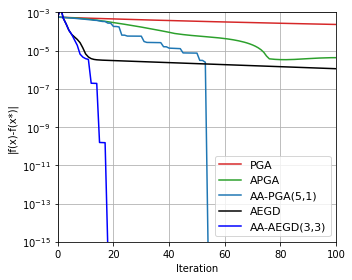

In [28]:
optval = min(Fx_aa.min(), Fx_nes.min(), Fx_ls.min(), Fx_ea.min())

fig1 = plt.figure(figsize=(5,4))
plt.plot(range(len(Fx)), [f - optval for f in Fx], c='#d62728', label='PGA')
plt.plot(range(len(Fx_nes)), [f - optval for f in Fx_nes], c='#2ca02c', label='APGA')
plt.plot(range(len(Fx_aa)), [f - optval for f in Fx_aa], c='#1f77b4', label='AA-PGA(5,1)')
plt.plot(range(len(Fx_e)), [f - optval for f in Fx_e], c='k', label='AEGD')
plt.plot(range(len(Fx_eam)), [f - optval for f in Fx_eam], c='b', label='AA-AEGD(3,3)')

plt.xlabel("Iteration")
plt.xscale('linear')
plt.ylabel('|f(x)-f(x*)|')
plt.yscale('log')
plt.legend(loc='best', prop={'size': 11})
plt.axis([0, 100, 1e-15, 1e-3])

plt.grid()
plt.tight_layout()
plt.rcParams.update({'font.size': 11})
plt.savefig('plot/lasso.png', dpi=300)